# 8.2 统计数据/变量的类型

大数据可分为两类： 计量（Numerical）和 分类（Categorical）。

计量或定量数据是一种度量，例如人的身高、体重、智商或血压； 或者是一种计数，比如一个人拥有的股票数量、一条狗的牙齿数量或者在入睡之前能度多少也喜欢的书。

分类或定性数据表示特征，比如人的性别、婚姻状况、家乡或喜欢的电影类型登。分类数据可以采用数值形式（ 如1表示男性，2 表示女性）表示，但着学数字没有任何数学意义。

数据类型：

（1）离散变量（Discrete Variable）----离散变量在有限时间内是可数的；例如，读者可以数一数口袋里的零钱，也能算一算自己银行账户上的钱，还可以统计所有人银行账户里的钱。

（2）连续变量（Continuous Variable）——连续变量需要连续不断地计算；事实上，它们是永远也算不完的。以人的年龄为例，年龄是不能计算的，因为它可能是25年、10个月、2天、5小时、4秒、4毫秒、8微秒、9纳秒等；但是可以把年龄转换成一个离散变量，然后进行计算，例如，按年计算一个人的年龄。

（3）定类变量（Nominal Variable）——定类变量是有两个或多个类别但没有内在顺序的变量。例如，房地产经纪人可以将物业划分为不同的类型，如房屋、公寓、合作社或平房。“物业类型”是一个定类变量，有4个类别，分别是房屋、公寓、合作社和平房。

（4）定序变量（Ordinal Variable）——定序变量与定类变量一样具有两个或多个类别，不同之处在于定序变量的类别可以排序或排名。所以当问起一群人是否喜欢苹果时，他们会回答“不太喜欢”，或者“还可以”，又或者“非常喜欢”，然后就产生了定序变量；此变量共有3个类别，即“不太喜欢”“还可以”和“非常喜欢”，可以把它们从最积极（非常喜欢）
 

# 8.3　平均数、中位数和众数

平均数（Mean）在英文中的另一种称呼是Average。要计算数据集的平均值，请用所有值之和除以值的个数。可以使用Numpy沿着指定轴计算算术平均值

In [2]:
import pandas as pd
import numpy as np
a = np.array([[1,2],[3,4]])
print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))

2.5
[2. 3.]
[1.5 3.5]


中位数（Median）是位于一组有序数列中间位置的数字。数组可以按升序或降序排列。当数据集的元素个数为奇数时，很容易找到中位数；当元素个数为偶数时，需要取位于序列中心的两个数字的平均值作为中位数。

In [3]:
a = np.array([[10,7,4],[3,2,1]])
print(np.median(a))
print(np.median(a, axis=0))
print(np.median(a, axis=1))

3.5
[6.5 4.5 2.5]
[7. 2.]


众数（Mode）是数据中出现次数最多的数值。为了计算众数，需要另一个来自于scipy或numpy的名为stats的包

In [4]:
from scipy import stats
a = np.array([[1,3,4,2,2,7],[5,2,2,1,4,1],[3,3,2,2,1,1]])
m = stats.mode(a)
print(m[0])

[[1 3 2 2 1 1]]


# 8.5 统计分布

当用与数据科学相关的必备统计知识武装自己时，很重要的须知内容之一是分布（Distribution）。正如概率的概念引出了数学计算，分布协助将隐藏的真相可视化。

（1）泊松分布（Poisson Distribution）——泊松分布用于计算在一个连续时间间隔内可能出现的事件个数。比如，在任意一段时间内会接到多少通电话，或者有多少人在排队。泊松分布是一种离散函数，这意味着事件只能用发生或不发生来度量，也意味着变量只能用整数度量。

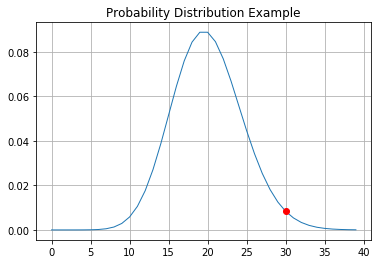

In [24]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
plt.title('Probability Distribution Example')
arr = []
rv = poisson(20)
for num in range(0,40):
    arr.append(rv.pmf(num))
prob = rv.pmf(30)
plt.grid(True)
plt.plot(arr,linewidth=1.0)
plt.plot([30],[prob],marker='o',markersize = 6, color='red')
plt.show()

首先从scipy.stats接口导入poisson包并且利用matplotlib库绘制分布，然后创建了一个名为rv的泊松离散型随机变量，接下来计算了概率质量函数（Probability Mass Function，PMF），这是一个可以预测或显示各个特定取值出现的数学概率的函数，最后使用了matplotlib的plot()和show()函数绘制图形。

（2）二项分布（Binomial Distribution）——只有两种可能结果，比如成功或失败、得或失、赢或输，并且所有试验的成功和失败的概率都相同，这种分布被称为二项分布。

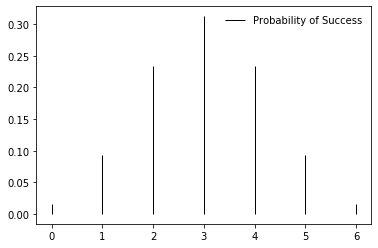

In [30]:
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
x = range(7)
n,p = 6, 0.5
rv = binom(n, p)
ax.vlines(x,0,rv.pmf(x), colors = 'k', linestyles='-',lw=1, label='Probability of Success')
ax.legend(loc='best',frameon=False)
plt.show()

从scipy.stats接口导入了binom包，然后创建了一个名为rv的二项离散随机变量。现在要在每个x处沿着最小y值到最大y值绘制垂直线，为此使用了matplotlib的vlines()函数，在其中将概率质量函数作为一个参数传递，然后像之前一样绘制并显示分布。

（3) 正态分布（Normal Distribution）——任何具有以下特征的分布都被称为正态分布。

• 分布的平均值、中位数和众数相同。

• 分布曲线呈钟形并且直线对称，正好一半在中心的左边，另一半在右边。

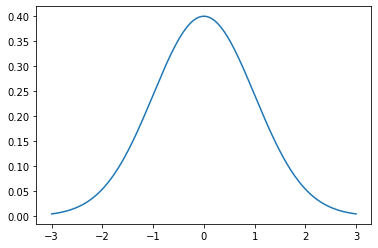

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
range = np.arange(-3,3,0.001)
plt.plot(range,norm.pdf(range,0,1))
plt.show()

从scipy.stats接口导入了norm包，之后在plot()函数中传递了正态连续型随机变量的概率密度函数（Probability DensityFunction，PDF）作为参数。概率密度函数是一个预测或显示某个值在某个区域内出现概率的函数。

# Pearson 相关系数

在实际的数据问题中，可能会面临数百个数据特征，并且也不能把它们全部都包含在分析中。这就是需要找到每个变量之间的关系的原因。Pearson相关系数是对两个变量之间线性相关程度的度量，用r表示。基本上，它试图绘制一条经过两个变量的数据的最佳拟合线，Pearson相关系数r表示所有数据点到最佳拟合线的距离（数据点与新模型/最佳拟合线的拟合程度）。

Pearson相关系数的取值范围是–1～1。值为0表示两个变量之间没有关联；值大于0表示正相关，即随着一个变量的值增加，另一个变量的值也会增加；值小于0表示负相关，即当一个变量值增加时，另一个变量值会减小。两个变量的相关性越强，Pearson相关系数的绝对值越接近1。

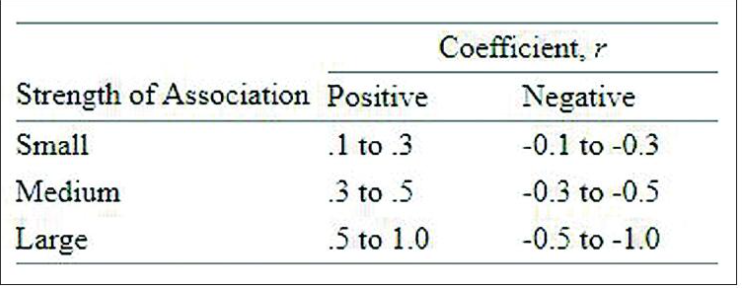

Python式解析Pearson相关系数的方法是，r_row表示Pearson相关系数，p_value表示没有关联的系统偶然产生的数据集的Pearson系数与从这两个数据集中通过公式计算所得的相关系数一样或更极端的概率，如图8-9所示。p值并不完全可靠，但对于数据量大于500的数据集而言还是比较合理的。

In [34]:
import scipy
from scipy.stats import pearsonr
x = np.array([-0.65499887,2.34644428,3.0])
y = np.array([-1.46049758,3.86537321,21.0])
r_row, p_value = pearsonr(x,y)
print(r_row)
print(p_value)

0.7961701483197556
0.41371200873701036


# 8.7 概率密度函数

概率密度函数或PDF用于说明随机变量落在某一个取值区域内，而不是取一个确定值的概率。概率密度函数处处都是非负的，而且它在整个空间内的积分等于1。

在Python中，可以按照以下方式解释PDF：从scipy.stats库导入norm包，并且使用numPy和matplotlib库创建一个正态分布概率密度函数。在图8-10的示例中，创建变量x，并把它赋给np.arange（-4，4，0.001），其范围是–4～4，增量为0.001，然后用plt.plot（x，norm.pdf（x））绘制一个正态分布概率密度函数。

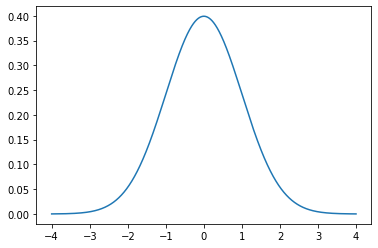

In [36]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-4,4,0.001)
plt.plot(x,norm.pdf(x))
plt.show()

Pearson相关系数在现实生活中有成千上万个应用案例。一个案例是——中国科学家想知道杂草稻种群的遗传差异之间的关系，旨在找出水稻的进化潜力，因此要分析两个种群之间的Pearson相关。杂草稻种群的Pearson积矩相关系数（Pearson Product Moment Correlation）为正值，范围是0.783～0.895。这一数值相当高，表明它们之间的关系相当密切。

# 8.9 统计推断与假设检验

统计推断是通过分析数据来推断基本分布特征的过程。推断统计分析用于推断群体特征，包括检验假设和推导估计。统计对分析大部分数据集是有帮助的。假设检验（Hypothesis testing）在即使没有科学理论存在的情况下也能够论证结论。统计假设，有时被称为验证性数据分析（ConfirmatoryData Analysis），在所观察的过程建模于一组随机变量的基础上是可检验的。在应用机器学习中，在任何想要验明数据分布或者两组数据的结果是否有差异的时候，都必须依赖统计假设检验。

简单地说，可以通过假设结果符合某种特定的结构来解释数据，这就是假设（Hypothesis）；然后使用统计方法来确定或拒绝假设，以此为目的的统计检验被称为统计假设检验。在统计学中，假设检验基于特定的假设会进行一些计算，检验结果会解释假设是否成立或者假设是否被违背。

以下是在机器学习中经常应用的两个具体例子。

• 假设数据具有正态分布的检验。

• 假设两个样本来自同一个基本群体分布。

统计检验的假设被称为无效假设（Null Hypothesis），或零假设（Hypothesis 0，H0）；通常称之为默认假设，或者说假设情况没有发生过任何改变。与检验假设相反的假设通常被称为第一假设、假设1或简称H1。H1实际上是“其他假设”，即备择假设，我们只知道有证据表明H0可以被拒绝。

通过分辨两种错误类型（类型1和类型2）和明确参数的限制（例如允许多少个类型1的错误）来帮助区分无效假设和备择假设。

现在通过一个实例来理解这些统计概念。作为练习，将研究如何从数据样本（样本均值）中准确描述学生的实际平均工作经验（总体均值），并且可以通过置信区间来量化结果的确定性。在本练习中，首先创建一个班级中数据科学专业学生的总体工作经验数组，并将其存储在名为dss_exp的变量中